1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [2]:
import pandas as pd

data = pd.read_csv('ToyotaCorolla - MLR.csv')

data.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


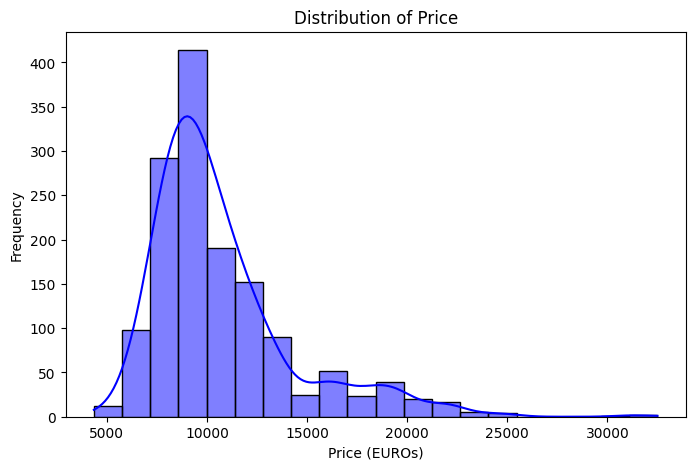

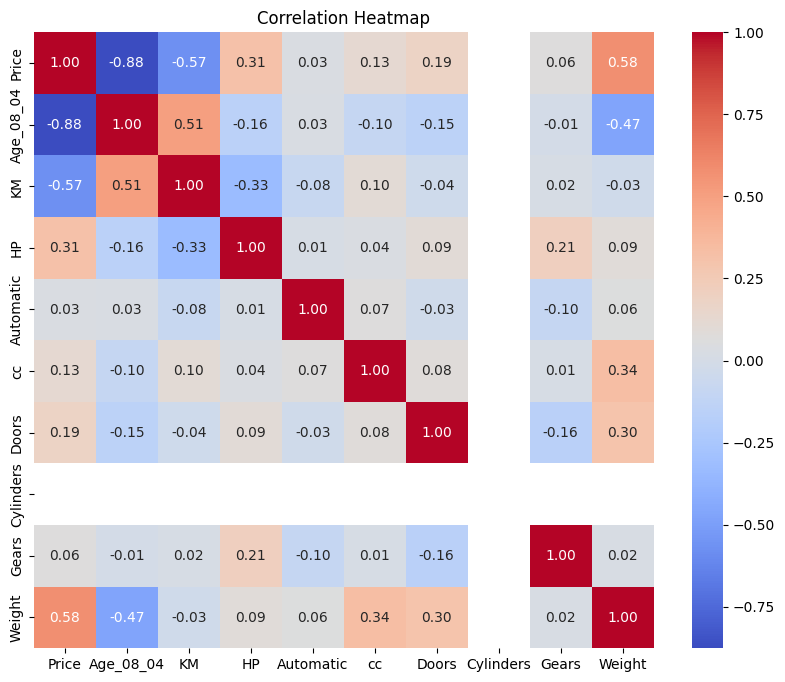

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical variables
numerical_summary = data.describe()
# Visualizing the distribution of the target variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, bins=20, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price (EUROs)')
plt.ylabel('Frequency')
plt.show()
# Correlation heatmap to understand relationships between numerical variables
plt.figure(figsize=(10, 8))
# Selecting only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
display(numerical_summary)

1.Distribution of Price: A histogram with a kernel density estimation (KDE) curve shows the spread of the car prices.

2.Correlation Heatmap: Displays the relationships between numerical variables to identify potential multicollinearity.

In [8]:
# Checking for missing values
missing_values = data.isnull().sum()
# Encoding categorical variables (Fuel_Type) using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)
# Scaling numerical features for MLR (optional, depending on regression algorithm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
# Dropping irrelevant or redundant columns, if any (e.g., Cylinders as it has no variance)
data_preprocessed = data_encoded.drop(columns=['Cylinders'])
# Displaying the updated preprocessed dataset for user review
display(data_preprocessed)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,-1.771966,-0.574695,-0.768042,0,0.997419,-1.085139,5,1.758561,True,False
1,13750,-1.771966,0.117454,-0.768042,0,0.997419,-1.085139,5,1.758561,True,False
2,13950,-1.718184,-0.715386,-0.768042,0,0.997419,-1.085139,5,1.758561,True,False
3,14950,-1.610620,-0.547650,-0.768042,0,0.997419,-1.085139,5,1.758561,True,False
4,13750,-1.395491,-0.801028,-0.768042,0,0.997419,-1.085139,5,1.853577,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,-1.035138,0,-0.652594,-1.085139,5,-0.901883,False,True
1432,10845,0.863362,-1.321120,-1.035138,0,-0.652594,-1.085139,5,-1.091915,False,True
1433,8500,0.809579,-1.374036,-1.035138,0,-0.652594,-1.085139,5,-1.091915,False,True
1434,7250,0.755797,-1.376703,-1.035138,0,-0.652594,-1.085139,5,-1.091915,False,True


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [9]:
from sklearn.model_selection import train_test_split
# Defineing features (X) and target variable (y)
X = data_preprocessed.drop(columns=['Price'])
y = data_preprocessed['Price']
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the shapes of the resulting datasets for verification
train_test_shapes = {
    "X_train shape": X_train.shape,
    "X_test shape": X_test.shape,
    "y_train shape": y_train.shape,
    "y_test shape": y_test.shape
}

train_test_shapes


{'X_train shape': (1148, 10),
 'X_test shape': (288, 10),
 'y_train shape': (1148,),
 'y_test shape': (288,)}



- **Training Set**: 1148 samples (80% of the data)
- **Testing Set**: 288 samples (20% of the data)


In [12]:
#3. Models
# Model 1 - coefficients and performance metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display # Importing display for showing DataFrames

# Initializeing the Linear Regression model
model = LinearRegression()
# Fitting the model on the training data
model.fit(X_train, y_train)
# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Calculateing performance metrics
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5  # Calculate RMSE manually
test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5  # Calculate RMSE manually
r2 = r2_score(y_test, y_test_pred)
# Interpreting model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Using display directly to show the DataFrame
print("Model 1 Coefficients and Performance Metrics:")
display(coefficients)
train_rmse, test_rmse, r2

Model 1 Coefficients and Performance Metrics:


,Feature,Coefficient
0,Age_08_04,-2246.662441
1,KM,-608.570564
2,HP,210.253304
3,Automatic,148.830927
4,cc,-12.885069
5,Doors,-57.436845
6,Gears,551.600710
7,Weight,1362.138679
8,Fuel_Type_Diesel,-68.548757
9,Fuel_Type_Petrol,1370.808910


(1303.339622411835, 1484.265415329652, 0.8348888040611081)

The first multiple linear regression model has been built, and the coefficients for each feature have been displayed for interpretation. Performance metrics are as follows:

* Training RMSE: 1303.34

* Testing RMSE: 1484.27

* R² Score: 0.835 (indicating the model explains approximately 83.5% of the variance in the target variable on the test data).

In [18]:
# Model 2: Linear Regression with interaction terms (e.g., Age_08_04 * KM)
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']
# Fitting a new model with interaction terms
model2 = LinearRegression()
model2.fit(X_train, y_train)
# Predicting on the training and testing sets for Model 2
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)
# Calculateing performance metrics for Model 2
train_rmse2 = mean_squared_error(y_train, y_train_pred2) ** 0.5  # Calculate RMSE manually
test_rmse2 = mean_squared_error(y_test, y_test_pred2) ** 0.5  # Calculate RMSE manually
r2_2 = r2_score(y_test, y_test_pred2)
# Interpreting coefficients for Model 2
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model2.coef_
})
# Using display directly to show the DataFrame
print("Model 2 Coefficients and Performance Metrics:")
display(coefficients2)
train_rmse2, test_rmse2, r2_2

Model 2 Coefficients and Performance Metrics:


,Feature,Coefficient
0,Age_08_04,-2054.098242
1,KM,-721.761272
2,HP,275.129982
3,Automatic,256.803346
4,cc,-21.598723
5,Doors,-42.106760
6,Gears,619.779113
7,Weight,1182.298710
8,Fuel_Type_Diesel,165.713765
9,Fuel_Type_Petrol,1069.231081


(1252.8351508615056, 1356.131783145475, 0.8621657410005827)

The second multiple linear regression model includes an interaction term between age and mileage. Performance metrics for this model are as follows:

* Training RMSE: 1252.84

* Testing RMSE: 1356.13

* R² Score: 0.862 (an improvement, explaining approximately 86.2% of the variance).

In [20]:
from sklearn.linear_model import Ridge
# Model 3: Ridge Regression (Regularized Linear Model)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
# Predicting on the training and testing sets for Ridge Model
y_train_pred3 = ridge_model.predict(X_train)
y_test_pred3 = ridge_model.predict(X_test)
# Calculateing performance metrics for Ridge Model
train_rmse3 = mean_squared_error(y_train, y_train_pred3) ** 0.5  # Calculate RMSE manually
test_rmse3 = mean_squared_error(y_test, y_test_pred3) ** 0.5  # Calculate RMSE manually
r2_3 = r2_score(y_test, y_test_pred3)
# Interpreting coefficients for Ridge Model
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})

print("Model 3 Coefficients and Performance Metrics:")
display(coefficients3)
train_rmse3, test_rmse3, r2_3


Model 3 Coefficients and Performance Metrics:


,Feature,Coefficient
0,Age_08_04,-2050.540637
1,KM,-725.563930
2,HP,276.131816
3,Automatic,252.150519
4,cc,-21.216961
5,Doors,-41.670332
6,Gears,608.879803
7,Weight,1179.102129
8,Fuel_Type_Diesel,105.730040
9,Fuel_Type_Petrol,996.942593


(1252.8677179888384, 1355.0992549960786, 0.862375548890012)

The third model uses Ridge Regression for regularization. Its performance metrics are as follows:

* Training RMSE: 1252.87

* Testing RMSE: 1355.10

* R² Score: 0.862 (similar to the second model but with regularization).

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculateing evaluation metrics for the best model (Ridge Regression)
mae = mean_absolute_error(y_test, y_test_pred3)
mse = mean_squared_error(y_test, y_test_pred3)
# Calculating RMSE without using the 'squared' argument
rmse = mean_squared_error(y_test, y_test_pred3) ** 0.5
r2 = r2_score(y_test, y_test_pred3)
# Compileing the evaluation metrics into a DataFrame for clarity
evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-Squared (R²)'],
    'Value': [mae, mse, rmse, r2]
})
# Using display to show the DataFrame
print("Evaluation Metrics for Ridge Regression Model:")
display(evaluation_metrics)

Evaluation Metrics for Ridge Regression Model:


,Metric,Value
0,Mean Absolute Error (MAE),9.405581e+02
1,Mean Squared Error (MSE),1.836294e+06
2,Root Mean Squared Error (RMSE),1.355099e+03
3,R-Squared (R²),8.623755e-01


The performance evaluation of the Ridge Regression model on the testing dataset is summarized with the following metrics:

- **Mean Absolute Error (MAE)**: Indicates the average error in predictions.
- **Mean Squared Error (MSE)**: Captures the overall error magnitude.
- **Root Mean Squared Error (RMSE)**: Provides a measure of prediction error in the same units as the target variable.
- **R² (R-Squared)**: Indicates how well the model explains the variance in the target variable.



5.Apply Lasso and Ridge methods on the model.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display

def display_dataframe_to_user(name, dataframe):
    """Displays a Pandas DataFrame with a given name.

    Args:
        name (str): The name to display before the DataFrame.
        dataframe (pd.DataFrame): The DataFrame to display.
    """
    print(f"{name}:")
    display(dataframe)
# Applying Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
# Predicting on the testing set for Lasso Model
y_test_pred_lasso = lasso_model.predict(X_test)
# Calculateing performance metrics for Lasso Model
lasso_mae = mean_absolute_error(y_test, y_test_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_test_pred_lasso)
# Calculate RMSE by taking the square root of MSE
lasso_rmse = lasso_mse ** 0.5
lasso_r2 = r2_score(y_test, y_test_pred_lasso)
# Compileing Lasso results
lasso_results = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-Squared (R²)'],
    'Value': [lasso_mae, lasso_mse, lasso_rmse, lasso_r2]
})
# Compileing Ridge results from earlier
ridge_results = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-Squared (R²)'],
    'Value': [mae, mse, rmse, r2]
})

display_dataframe_to_user(name="Lasso Regression Evaluation Metrics", dataframe=lasso_results)
display_dataframe_to_user(name="Ridge Regression Evaluation Metrics", dataframe=ridge_results)

Lasso Regression Evaluation Metrics:


,Metric,Value
0,Mean Absolute Error (MAE),9.407914e+02
1,Mean Squared Error (MSE),1.839796e+06
2,Root Mean Squared Error (RMSE),1.356391e+03
3,R-Squared (R²),8.621131e-01


Ridge Regression Evaluation Metrics:


,Metric,Value
0,Mean Absolute Error (MAE),9.405581e+02
1,Mean Squared Error (MSE),1.836294e+06
2,Root Mean Squared Error (RMSE),1.355099e+03
3,R-Squared (R²),8.623755e-01


### Interview Questions and Answers:

#### **1. What is Normalization & Standardization and how is it helpful?**

- **Normalization**:
  - Rescales the values of a feature to a range of [0, 1] or [-1, 1].
  
  - **When to use**: It is helpful when the features have different scales and the model relies on the magnitude of the input values, such as in KNN or Neural Networks.

- **Standardization**:
  - Rescales the values of a feature so that the mean is 0 and the standard deviation is 1.
  - **When to use**: It is useful when features follow a Gaussian (normal) distribution or when the model assumes normally distributed features, such as in linear regression or SVMs.

- **Benefits**:
  - Ensures features contribute equally to the model's predictions.
  - Improves convergence speed of optimization algorithms.
  - Reduces the impact of features with larger scales on the model.

---

#### **2. What techniques can be used to address multicollinearity in multiple linear regression?**

- **Techniques**:
  1. **Variance Inflation Factor (VIF)**:
     - Calculate the VIF for each feature and remove features with high VIF values (e.g., >10) as they indicate multicollinearity.

  2. **Feature Selection**:
     - Identify and remove redundant or highly correlated features to reduce multicollinearity.

  3. **Principal Component Analysis (PCA)**:
     - Transform the features into a set of uncorrelated principal components and use these components for regression.

  4. **Regularization Methods**:
     - Use Ridge Regression (L2 regularization) to penalize large coefficients or Lasso Regression (L1 regularization) to shrink and eliminate coefficients of less important features.

  5. **Centering the Data**:
     - Center variables by subtracting their mean. This can reduce multicollinearity caused by interaction terms.

  6. **Domain Expertise**:
     - Use knowledge of the domain to prioritize the inclusion of certain features over others.